## Data augmentation 라이브러리
- ImageDataGenerator
- 

# ImageDataGenerator
- 학습시 모델에 Image dataset을 제공하는 파이프라인 Generator
    - Image Augmentation(이미지증식)을 적용한다.
    - 데이터를 모델에 배치단위로 제공한다.
- 데이터 전체가 순환되어 배치 생성을 끝없이 함
    - https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

## ImageDataGenerator()
- 매개변수: 이미지 증식(augmentation) 관련 설정을 정의
    - **fill_mode**: 이동이나 회전시 생기는 공간을 어떻게 채울 것인지 설정
        - nearest: 빈공간에 가장 가까운 pixel로 채우기 (1,2,3 [3],[3],[3])
        - reflect: 빈공간 근처 공간의 값을 거울로 반사되는 값들으로 채움. (1,2,3 [3],[2],[1])
        - constant: 지정한 값으로 채움. 기본은 0이고 특정값으로 채울때는 cval=100 으로 설정
    - Nomalization 설정
        - **rescale**: 지정한 값을 각 픽셀에 곱한다. (rescale=1/255.)
        - **featurewise_center=True**: channel의 평균을 pixel에서 빼서 평균을 0으로 표준화한다. (channl 별로 처리)
        - **featurewise_std_nomalization=True**: channel 별로 표준화한다. (평균 0, 표준편차 1)
    - 반전
         - **horizontal_flip=True**: 좌우반전, **vertical_flip=True**: 상하 반전
    - 회전(rotation)
         - **rotation_range**=정수:  -정수 ~ +정수 범위로 랜덤 회전 (rotation_rate=30 : -30 ~ +30도 사이에서 랜덤하게 회전)
    - 이동
         - **width_shift_range=실수**: 좌우이동, **height_shift_range=실수**: 상하 이동
         - 실수값: 이동범위지정.  0 ~ 1 이면 이미지 너비, 높이 기준 비율. 1이상이면 pixel.
    - Zoom 
         - **zoom_range**: 실수 또는 [lower, upper]
             - 실수: [1-실수값, 1+실수값]
             - 1미만이면 확대(zoom in), 1초과면 축소(zoom out)
    - shear(전단변환): 평행사변형 형태로 변환
        - **shear_range**: 실수 - 각도 지정
    - 명암 (brightness)
        - **brightness_range** : 실수값 2개를 가지는 튜플이나 리스트. 명암 범위
        - 1이 원본. 0에 가까우면 어둡고 1보타 크면 밝아진다. 
          
- flow 메소드들
    - ImageDataGenerator에 Image Data를 batch 단위로 공급하는 Iterator 생성

## ImageDataGenerator에 dataset을 제공하는 메소드

- ### flow_from_directory () 
    - 학습시 파일 경로에 저장된 디렉토리로 부터 이미지를 읽어와 변형 처리 후 모델(네트워크)에 제공하는 Iterator 생성.
    - 주요 매개변수
        - directory: 이미지 저장 경로 (이미지는 지정한 디렉토리내에 클래스 별로 디렉토리가 나눠져 저장되 있어야 한다. 오름차순으로 Label이 생성.),
        - target_size: 이미지 크기. 지정한 크기로 resize한다. 기본값: (256,256)
        - color_mode: "grayscale"(흑백일때), "rgb", "rgba" 중에 하나를 지정. 기본값: "rgb"(컬러일때/ 기본값이니까 생략가능)
        - class_mode: 분류 종류 지정
            - 'binary' : binary class 분류
            - 'category' : multi class 분류. label(output)이 one hot encoding 된 경우 지정
            - 'sparse' : multi class 분류. label(output)이 label encoding 형식인 경우 지정
            - None: 기본값. 하위디렉토리로 추론
        - batch_size: 미니배치 사이즈 지정 (기본 : 32)
    - 반환값
        - DirectoryIterator: batch size만큼 image와 label을 제공하는 Generator
    - 지정한 directory의 구조
            ![image.png](attachment:image.png)
    
    - 디렉토리 별로 class를 지정한다.
    - class 조회: `DirectoryIterator객체.class_indices.keys()`
    
    
- ### 사용 순서.
1. from tensorflow.keras.preprocessing.image import ImageDataGenerator  후에 train_generator, test_genrator 를 만든다.
   - train_gen 은 여러가지 설정을 통해 이미지를 변화시켜 데이터 수를 늘릴 수 있도록 해주고 , test_gen은 rescale만 해준다.
2. generator 를 이용해서 train_iterator 와 test_iterator,validation_iterator를 만든다.
    -예시 train_iterator = train_datagen.flow_from_directory(train_dir, # flow_from_directory니까 train파일이 잇는 dir경로를 넣어줌(변수처리함)
                                                           target_size =(IMAGE_SIZE,IMAGE_SIZE), # 차원 안넣음
                                                           class_mode ='binary',
                                                           batch_size = N_BATCHS)
                                                           
3. 이후에는 model.fit을 하면된다.. 

- ### flow_from_dataframe()
    - 읽어올 파일의 경로와 label을 DataFrame으로 생성한 뒤 그것을 이용해 파일을 Loading한다.
    - 처음에 데이터 프레임 파일을 만들어야 하지만 판다스나 넘파이를 이용해서 다양하게 처리 할 수 있다..
    - dataframe
        - DataFrame: image 데이터의 절대경로와 label을 저장한 DataFrame객체
        - x_col: image경로 컬럼명
        - y_col: label 컬럼명
        - target_size: 이미지 크기. 지정한 크기로 resize한다. 기본값: (256,256)
        - color_mode: "grayscale", "rgb", "rgba" 중에 하나를 지정. 기본값: "rgb"
        - class_mode: 분류 종류 지정
            - 'binary' : binary class 분류
            - 'category' : multi class 분류. label(output)이 one hot encoding 된 경우 지정
            - 'sparse' : multi class 분류. label(output)이 label encoding 형식인 경우 지정
            - None: 기본값. 하위디렉토리로 추론
        - batch_size: 미니배치 사이즈 지정 (기본 : 32)
        
        
- ### 사용 순서.
1. from tensorflow.keras.preprocessing.image import ImageDataGenerator  후에 train_generator, test_genrator 를 만든다.
   - train_gen 은 여러가지 설정을 통해 이미지를 변화시켜 데이터 수를 늘릴 수 있도록 해주고 , test_gen은 rescale만 해준다.validation도 
2. generator 를 이용해서 train_iterator 와 test_iterator,validation_iterator를 만든다.
    -예시 train_iterator = train_datagen.flow_from_dataframe(train_df, # flow_from_directory니까 train파일이 잇는 dir경로를 넣어줌(변수처리함)
                                                           x_col = 'path' 데이터가 잇는 경로를 담은 column이름
                                                           
                                                           target_size =(IMAGE_SIZE,IMAGE_SIZE), # 차원 안넣음
                                                           class_mode ='binary',
                                                           batch_size = N_BATCHS)

3. 이후에는 model.fit을 하면된다.. 

- ### flow()
    - ndarray 타입의 이미지를 받아서 처리. // 메모리에 이미 올라와있는 데이터.. // ndarray로 이미바뀌어 있는..그때 쓴다..
    - 주요 매개변수
        - x: input data. 4차원 배열(크기, height, width, channel)
        - y: labels. 
        - batch_size: 미니 배치 크기(기본값:32)
- ### 모델(네트워크)에서 fit() 호출하기 전까지는 preprocessing과 Data Loading이 실행되지 않는다.

## 흐름
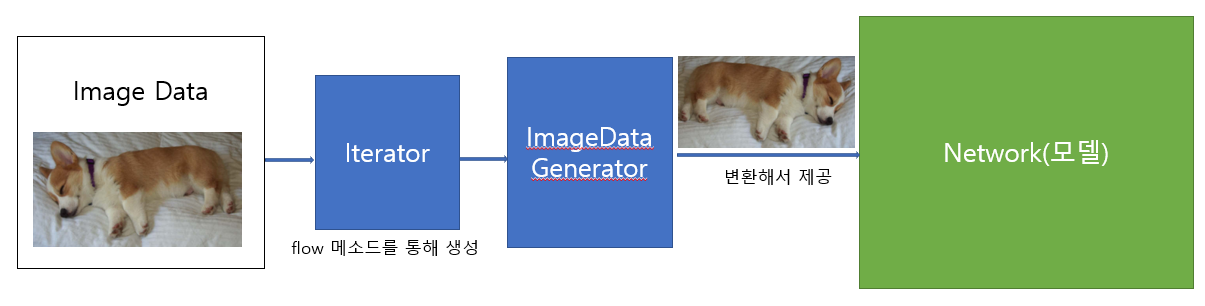

In [3]:
# pillow 패키지 설치
!pip install Pillow

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

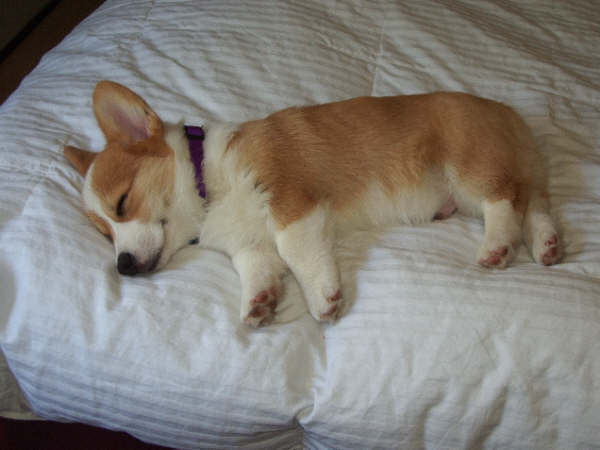

In [9]:
img = load_img('image.jpg')
img

In [5]:
# ndarray 변환
img_arr = img_to_array(img)
# 0 번추가
sample = img_arr[np.newaxis, ...]  # 넘파이 배열로 바꿔서 메모리에 올려놓은것.!
sample.shape  # 축을 늘려줘야함..  불러온 데이터를 넣어줄때 배치 사이즈를 넣어줘야해서 이미지는 1개를 넣을꺼니까.. 축1을 추가

(1, 450, 600, 3)

(1, 450, 600, 3)
(1, 450, 600, 3)
(1, 450, 600, 3)
(1, 450, 600, 3)
(1, 450, 600, 3)
(1, 450, 600, 3)
(1, 450, 600, 3)
(1, 450, 600, 3)
(1, 450, 600, 3)


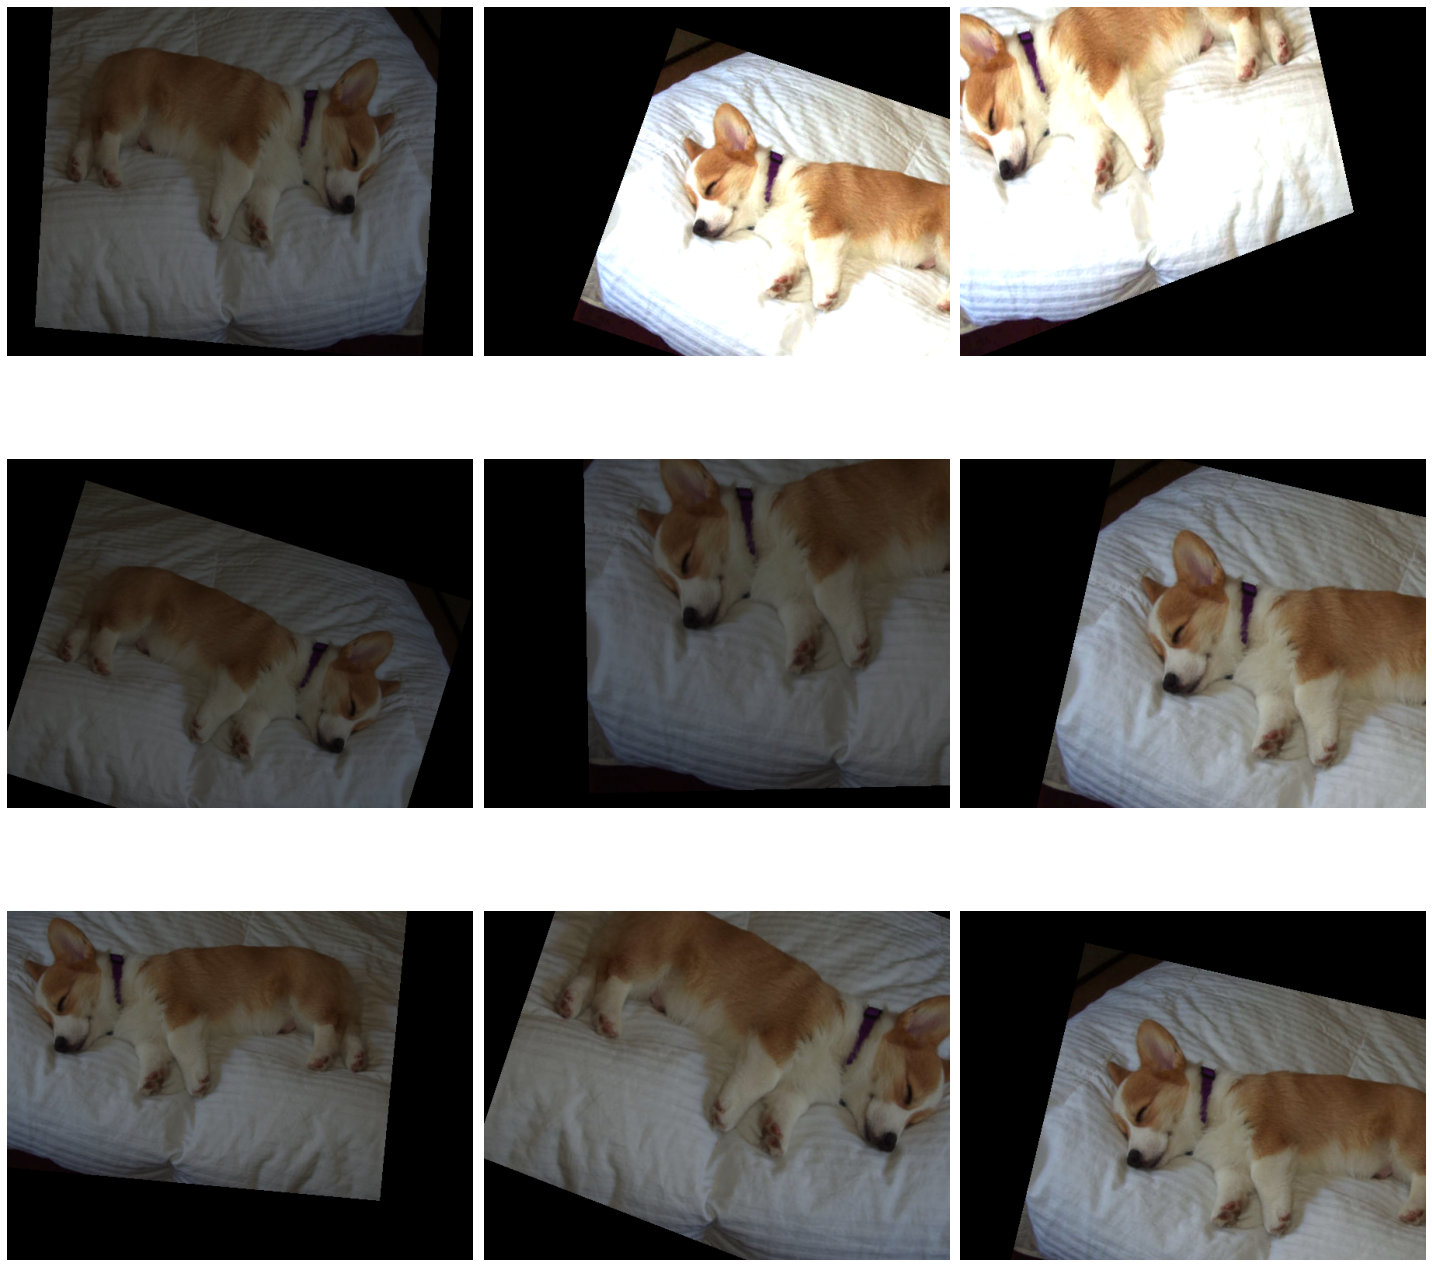

In [43]:
## 이미지는 하나지만 여러가지 이미지로 늘려서 데이터 개수를 늘리는 효과가 생김
## 주의 할점은 진짜 있을만한 이미지로 변환이 되게 넣어줘야한다... 효과를 너무 강하게 줘서 이미지가깨지면 그 이미지가 잡음이 되어 버린다... 
## 확인을 꼭해보고 이상치가 안나오도록 해줘야한다.

#ImageDataGenerator 생성 -> 전처리관련(Agumentation) 설정
#datagen = ImageDataGenerator()  #generator// next() 하면 계속 이미지 제공 
#datagen = ImageDataGenerator(rescale = 1./255) # 각각의 픽셀을 1/255
#datagen = ImageDataGenerator(width_shift_range = 0.5, fill_mode= 'constant')#,cval = 255)  # 좌우 이동. -50% ~50% 비율 좌우 이동  
#datagen = ImageDataGenerator(height_shift_range = 0.5, fill_mode= 'constant') # 상하 좌우
#datagen = ImageDataGenerator(rotation_range=40, fill_mode= 'constant')  # -40~40 도 사이의 범위에서 회전
#datagen = ImageDataGenerator(shear_range = 40, fill_mode= 'constant')  # +- 40 범위에서 전단변환(평행사변형 혀ㅕㅇ태 )
#datagen = ImageDataGenerator(zoom_range= 0.2, fill_mode= 'constant') 
   # zoom : 1이 원본. 1미만 - zoom in , 1초과면 zoom out //zoom_range = 0.2 일때 [1-0.2, 1+0.2] :0.8~1.2 사이의 크기로 바뀜
#datagen = ImageDataGenerator(brightness_range= (0,2))  
   # 밝기처리. 1: 원본, 1미만 : 원본보다 어둡기, 1이상 : 원본보다 밝기.(어두운정도, 밝은 정도)
#datagen = ImageDataGenerator(horizontal_flip= True) # 좌우 반전.
#datagen = ImageDataGenerator(vertical_flip= True)   # 상하 반전

datagen = ImageDataGenerator( #rescale = 1./255,
                             rotation_range = 20, 
                             width_shift_range= 0.3,
                             height_shift_range= 0.3,
                             zoom_range = 0.2,
                             brightness_range= (0.3,1.5),
                             horizontal_flip= True,
                             fill_mode = 'constant')  # 적용되는 것도 있고 안되는 것도 있고 .. 범위사이에 랜덤으로 적용됨..


data_iterator = datagen.flow(sample, batch_size = 1)  # iterator  ..\ 제너레이터에서 이터레이터를 뽑아 나온다... 
#print(type(datagen), type(data_iterator))
plt.figure(figsize= (20,20))
for i in range(9):
    plt.subplot(3,3,i+1)
    batch = data_iterator.next() # 설치된 배치 개수 만큼 이미지(data)를 제공하는 메소드.
    #print(np.max(batch),np.min(batch))
    #print(batch.shape)
    img = batch[0].astype('uint8')  ## batch_image[0]- 이미지,, ,, batch_image[1]- label /float으로 넣어주면 error가 발생하기 때문에 양수만 처리하는 unit8로 바꿔줌
    plt.imshow(img)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

In [41]:
data_iterator

AttributeError: 'NumpyArrayIterator' object has no attribute 'shape'